In [1]:
import polars as pl
import pandas as pd
import numpy as np
import pyarrow

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download Dataset or run in a kaggle notebook
# https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store

### Read 5GB CSV file

In [3]:
df = pl.read_csv("2019-Nov.csv")

# Basic operations

In [4]:
df.shape

(67501979, 9)

## Print options

In [5]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:...","""view""",1003461,2053013555631882655,"""electronics.sm...","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-..."
"""2019-11-01 00:...","""view""",5000088,2053013566100866035,"""appliances.sew...","""janome""",293.65,530496790,"""8e5f4f83-366c-..."
"""2019-11-01 00:...","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-..."
"""2019-11-01 00:...","""view""",3601530,2053013563810775923,"""appliances.kit...","""lg""",712.87,518085591,"""3bfb58cd-7892-..."
"""2019-11-01 00:...","""view""",1004775,2053013555631882655,"""electronics.sm...","""xiaomi""",183.27,558856683,"""313628f1-68b8-..."


In [6]:
print(df.head(2))

shape: (2, 9)
┌──────────┬─────────────┬────────────┬───────────┬─────┬────────┬────────┬───────────┬────────────┐
│ event_ti ┆ event_type  ┆ product_id ┆ category_ ┆ ... ┆ brand  ┆ price  ┆ user_id   ┆ user_sessi │
│ me       ┆ ---         ┆ ---        ┆ id        ┆     ┆ ---    ┆ ---    ┆ ---       ┆ on         │
│ ---      ┆ str         ┆ i64        ┆ ---       ┆     ┆ str    ┆ f64    ┆ i64       ┆ ---        │
│ str      ┆             ┆            ┆ i64       ┆     ┆        ┆        ┆           ┆ str        │
╞══════════╪═════════════╪════════════╪═══════════╪═════╪════════╪════════╪═══════════╪════════════╡
│ 2019-11- ┆ view        ┆ 1003461    ┆ 205301355 ┆ ... ┆ xiaomi ┆ 489.07 ┆ 520088904 ┆ 4d3b30da-a │
│ 01       ┆             ┆            ┆ 563188265 ┆     ┆        ┆        ┆           ┆ 5e4-49df-b │
│ 00:00:00 ┆             ┆            ┆ 5         ┆     ┆        ┆        ┆           ┆ 1a8-ba5943 │
│ UTC      ┆             ┆            ┆           ┆     ┆        ┆        ┆  

In [7]:
df.head().to_pandas()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,None,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [8]:
# UTF8 -> string
# Int, Float as usual
df.dtypes

[Utf8, Utf8, Int64, Int64, Utf8, Utf8, Float64, Int64, Utf8]

# Selecting and Filtering Data 

Here I'll do operations that are similar to the SELECT and WHERE commands in SQL.

## 1. Indexing with [ works but is an "anti-pattern" in polars

There is no `df.loc` or `df.iloc` as polars doesn't have indexes

In [9]:
df[0,:]

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:...","""view""",1003461,2053013555631882655,"""electronics.sm...","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-..."


In [10]:
df[:,['event_time', "price"]].head()

event_time,price
str,f64
"""2019-11-01 00:...",489.07
"""2019-11-01 00:...",293.65
"""2019-11-01 00:...",28.31
"""2019-11-01 00:...",712.87
"""2019-11-01 00:...",183.27


In [11]:
# Works but looks awful
# df.filter(df["price"] > 100)

# Better to use this
df.filter(pl.col("price") > 1000).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:...","""view""",1004237,2053013555631882655,"""electronics.sm...","""apple""",1091.33,565404816,"""d9cf0ac4-c3ec-..."
"""2019-11-01 00:...","""view""",1005116,2053013555631882655,"""electronics.sm...","""apple""",1013.86,532647354,"""d2d3d2c6-631d-..."
"""2019-11-01 00:...","""view""",1004241,2053013555631882655,"""electronics.sm...","""apple""",1173.6,565404816,"""d9cf0ac4-c3ec-..."
"""2019-11-01 00:...","""view""",1004237,2053013555631882655,"""electronics.sm...","""apple""",1091.33,519277091,"""62fadce6-aa4a-..."
"""2019-11-01 00:...","""view""",1307012,2053013558920217191,"""computers.note...","""apple""",2342.15,530857208,"""c69f9c63-7098-..."


## 2. Select data with idiomatic polars

In [12]:
df.sample(5).to_pandas()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-08 04:20:28 UTC,view,1307451,2053013558920217191,computers.notebook,acer,720.71,512483288,b7bb66f7-f3c8-414e-a024-4233c9b007e7
1,2019-11-15 04:37:52 UTC,cart,1005253,2053013555631882655,electronics.smartphone,xiaomi,290.09,571678192,ac3748e8-4f4c-424e-91a4-6bc500832dc9
2,2019-11-20 09:21:24 UTC,view,13900135,2053013557343158789,construction.components.faucet,lemark,45.59,559986940,2f3ecbc7-1947-4144-979f-db88a21381b0
3,2019-11-16 19:48:57 UTC,view,47200161,2110937223082804123,furniture.living_room.cabinet,vako,77.18,512450708,16dba482-d65c-44d7-9b53-fe332a67cd1e
4,2019-11-02 17:20:14 UTC,view,1004856,2053013555631882655,electronics.smartphone,samsung,127.89,566851471,a7389ad2-2538-4ccf-9b4d-482edb2b2270


In [13]:
# SQL SELECT type of operation. Just selecting columns
df.select(['brand', 'price']).head()

brand,price
str,f64
"""xiaomi""",489.07
"""janome""",293.65
"""creed""",28.31
"""lg""",712.87
"""xiaomi""",183.27


In [16]:
# Keeps all the original columns and adds a new one
# Similar to a SELECT * in SQL
df.with_columns([
    (pl.col("price") * 100).alias("price_x_100")
]).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_x_100
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-11-01 00:...","""view""",1003461,2053013555631882655,"""electronics.sm...","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-...",48907.0
"""2019-11-01 00:...","""view""",5000088,2053013566100866035,"""appliances.sew...","""janome""",293.65,530496790,"""8e5f4f83-366c-...",29365.0
"""2019-11-01 00:...","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-...",2831.0
"""2019-11-01 00:...","""view""",3601530,2053013563810775923,"""appliances.kit...","""lg""",712.87,518085591,"""3bfb58cd-7892-...",71287.0
"""2019-11-01 00:...","""view""",1004775,2053013555631882655,"""electronics.sm...","""xiaomi""",183.27,558856683,"""313628f1-68b8-...",18327.0


In [17]:
df.filter(pl.col("price") > 1000).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:...","""view""",1004237,2053013555631882655,"""electronics.sm...","""apple""",1091.33,565404816,"""d9cf0ac4-c3ec-..."
"""2019-11-01 00:...","""view""",1005116,2053013555631882655,"""electronics.sm...","""apple""",1013.86,532647354,"""d2d3d2c6-631d-..."
"""2019-11-01 00:...","""view""",1004241,2053013555631882655,"""electronics.sm...","""apple""",1173.6,565404816,"""d9cf0ac4-c3ec-..."
"""2019-11-01 00:...","""view""",1004237,2053013555631882655,"""electronics.sm...","""apple""",1091.33,519277091,"""62fadce6-aa4a-..."
"""2019-11-01 00:...","""view""",1307012,2053013558920217191,"""computers.note...","""apple""",2342.15,530857208,"""c69f9c63-7098-..."


In [18]:
df.filter(
    pl.col('brand').is_in(['apple', 'samsung', 'motorola'])
).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:...","""view""",1004258,2053013555631882655,"""electronics.sm...","""apple""",732.07,532647354,"""d2d3d2c6-631d-..."
"""2019-11-01 00:...","""view""",4600658,2053013563944993659,"""appliances.kit...","""samsung""",411.83,526595547,"""aab33a9a-29c3-..."
"""2019-11-01 00:...","""view""",1005115,2053013555631882655,"""electronics.sm...","""apple""",949.47,562079864,"""0fe64462-83eb-..."
"""2019-11-01 00:...","""view""",1002544,2053013555631882655,"""electronics.sm...","""apple""",458.28,549256216,"""dcbdc6e4-cd49-..."
"""2019-11-01 00:...","""cart""",1005014,2053013555631882655,"""electronics.sm...","""samsung""",503.09,533326659,"""6b928be2-2bce-..."


# Computation on the select context

In [19]:
df.select([
    pl.col("product_id").n_unique()
])

product_id
u32
190662


In [20]:
df.select([
    pl.col("price").min().alias("min"),
    pl.col("price").mean().alias("mean"),
    pl.col("price").median().alias("median"),
    pl.col("price").max().alias("max"),
    pl.col("price").std().alias("std_dev"),
])

min,mean,median,max,std_dev
f64,f64,f64,f64,f64
0.0,292.459317,165.77,2574.07,355.6745


In [22]:
# compute describe at a series level
df.select([
    pl.col("price")
]).describe()

describe,price
str,f64
"""count""",6.7501979e7
"""null_count""",0.0
"""mean""",292.459317
"""std""",355.6745
"""min""",0.0
"""max""",2574.07
"""median""",165.77


In [23]:
price = df.select([
    pl.col("price")
])

array([[<AxesSubplot: title={'center': 'price'}>]], dtype=object)

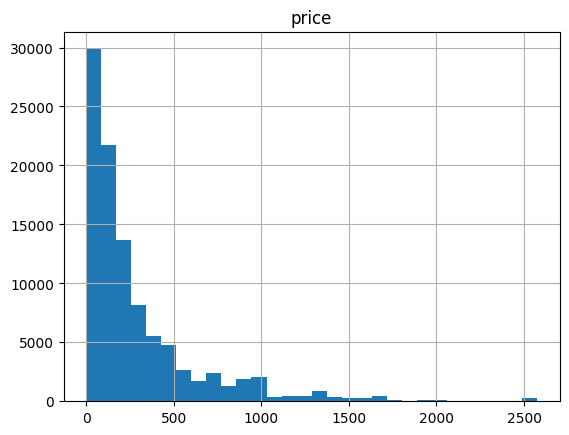

In [28]:
price.sample(100000).to_pandas().hist(bins=30)

In [26]:
# price.sample(1000)

In [29]:
probs = [0, 0.25, 0.5, 0.75, 1]
percentiles = [price.quantile(prob)[0,0] for prob in probs]
pd.DataFrame(dict(probs=probs, percentiles=percentiles))

,probs,percentiles
0,0.00,0.00
1,0.25,69.24
2,0.50,165.77
3,0.75,360.34
4,1.00,2574.07
